# Skeleton Analysis
 - This notebook can only be used after MK_Analysis has concluded.
 
- This notebook models the nodes and lengths of proplatelet skeletons (refer to BranchPointImages) produced from the Mouse_MK CP pipeline. Using networkx, the edges & vertices are graphed to visualize and measure protrusions.



In [896]:
%matplotlib inline
import os
import os.path
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
# from tkinter.filedialog import askdirectory

In [ ]:
# image_directory = C:\Users\Prakrith\Desktop\skt

In [ ]:
# path_to_cellprofiler = r"C:\Program Files (x86)\CellProfiler\CellProfiler.exe"
# path_to_cp_pipeline = r"C:\Users\Prakrith\Documents\GitHub\Test\pipelines\180311_MouseMK_Skel.cppipe"

In [ ]:
# imdir_single = os.path.join(image_directory,"single_images")
# single_list = glob.glob(os.path.join(imdir_single,"*.tif"))
# imdir_ilastik = os.path.join(image_directory,"ilastik")
# ilastik_list = glob.glob(os.path.join(imdir_ilastik,"*.png"))
# output_directory = os.path.join(image_directory,"output") #label folder is nested in output
# imdir_label = os.path.join(output_directory,"labels")
# label_list = glob.glob(os.path.join(imdir_label,"*.tif"))

In [ ]:
# big_list = single_list + ilastik_list + label_list
# with open(os.path.join(image_directory,"filelist2.txt"), 'w') as f:
#     for item in big_list:
#         f.write("{}\n".format(item))

In [ ]:
# os.makedirs(os.path.join(image_directory, "skeleton")), exist_ok=True)
# skeleton_directory = os.path.join(image_directory,"skeleton")

In [ ]:
# process = subprocess.Popen([path_to_cellprofiler,
#                   "--run-headless",
#                   "--pipeline={}".format(path_to_cp_pipeline),
#                   "--file-list={}".format(os.path.join(image_directory,"filelist2.txt")),
#                   "--image-directory={}".format(image_directory),
#                   "--output-directory={}".format(skeleton_directory)
#                  ], stdout=subprocess.PIPE, stderr=subprocess.PIPE, shell=True)

# out, err = process.communicate()

In [1188]:
vertices_csv = open(os.path.join(skeleton_directory,r'vertices.csv'));
df = pd.read_csv(vertices_csv);
df.columns = ['image_number', 'vertex_number','y','x','labels','kind'];
cols = ['image_number', 'vertex_number', 'x','y','labels', 'kind']
df = df[cols]
df.to_csv(os.path.join(skeleton_directory,r'vert.csv'));
vert_csv = open(os.path.join(skeleton_directory,r'vert.csv'));
header = ["vertex_number","x","y","image_number",'labels']; 
v_df = pd.read_csv(vert_csv,usecols=header);

In [1167]:
# def node_find(vert,i):
#     slc = vert[vert['image_number'] == i];
#     slc = slc.drop(columns=['image_number']);
#     nodes = slc.set_index('vertex_number').T.to_dict('list');
#     return nodes; #takes all nodes from vert and converts to dict of lists

In [1182]:
nodes = node_find(v_df,i)

In [1190]:
nodes = node_find2(v_df,i,l)

{1: [1004, 312], 2: [1001, 315], 3: [999, 317], 5: [995, 321]}

In [ ]:
# G = DiGraph()
# nodes = csv.DictReader(open(nodeFile, 'rU'), ['index', 'label', 'type'])
# for row in nodes:
#     G.add_node(row['index'], {'index':row['index'], 'label':row['label'], 'type':row['type']})
# edges = csv.DictReader(open(edgeFile, 'rU'), ['v1', 'v2', 'weight'])
# for row in edges:
#     G.add_edge(row['v1'], row['v2'], row[weight'])

In [1187]:
def node_find2(vert,i,l):
    slc = vert[vert['image_number'] == i]
    slc2 = slc[slc['labels'] == l];
    slc2 = slc2.drop(columns=['image_number','labels']);
    nodes = slc2.set_index('vertex_number').T.to_dict('list');
    return nodes; #takes nodes from specific proplatelet struct within specific img, return as dict of list

In [1161]:
G = nx.Graph();

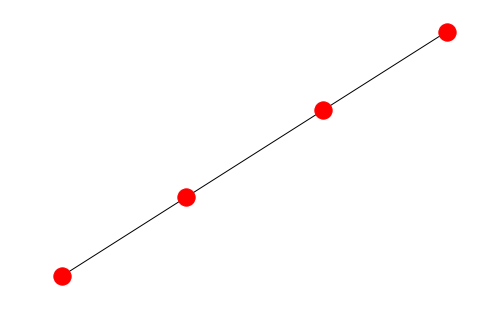

In [1191]:
H = nx.path_graph(nodes)
nx.draw(H)
plt.show()

In [ ]:
edges_csv = open(os.path.join(skeleton_directory,r'edges.csv'));
e_df = pd.read_csv(edge_csv)

In [ ]:
def edge_find(edge,i):
    slc = edge[edge['image_number'] == i];
    slc = slc.drop(columns=['image_number','total_intensity']);
#     edges = slc.set_index('vertex_number').T.to_dict('list');
    return edges;

In [1145]:
my_dpi=120

In [1160]:
fig = plt.figure(frameon=False)
fig.set_size_inches(17.77777,14.2222)

<Figure size 1280x1024 with 0 Axes>

In [1149]:
o

<Figure size 1280x1024 with 0 Axes>

In [1144]:
e_df

,image_number,v1,v2,length,total_intensity
0,1,1,2,4,2.79
1,1,3,5,6,3.35
2,1,6,7,5,1.94
3,1,4,8,5,2.43
4,1,7,8,3,1.10
5,1,8,10,8,4.94
6,1,6,11,12,4.61
7,1,11,12,3,0.92
8,1,10,13,6,2.64
9,1,9,14,10,4.31


In [1164]:
vertices_csv = r'C:\Users\Prakrith\Desktop\skt\sk\vertices.csv'

In [1165]:
skeleton_directory = r"C:\Users\Prakrith\Desktop\skt\sk"
vert_csv = r"C:\Users\Prakrith\Desktop\skt\sk\vert.csv"
edge_csv = r"C:\Users\Prakrith\Desktop\skt\sk\edge.csv"

In [1118]:
slc = v_df[v_df['image_number'] == i] & v_df[v_df['labels'] == l]

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

In [1137]:
slc2 = slc[slc['labels'] == l]

In [1130]:
i = int(input("Which image?:")) #set like dirs

Which image?:1


In [1131]:
l = int(input("Which Proplatelet Structure?:")) #set like dirs

Which Proplatelet Structure?:2


In [1138]:
slc2

,image_number,vertex_number,x,y,labels
0,1,1,1004,312,2
1,1,2,1001,315,2
2,1,3,999,317,2
4,1,5,995,321,2


In [1140]:
slc2

,image_number,vertex_number,x,y,labels
0,1,1,1004,312,2
1,1,2,1001,315,2
2,1,3,999,317,2
4,1,5,995,321,2


In [1084]:
nodes = node_find(v_df,i)

In [1090]:
nodes = [1,2]

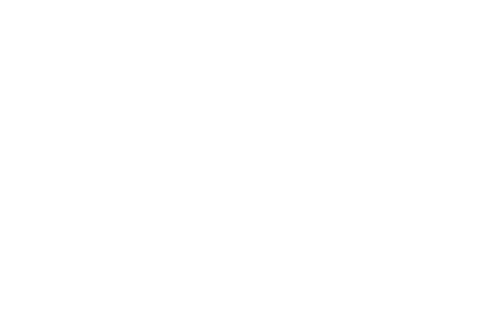

In [1091]:
nx.draw(G,nodes)